In [71]:
import scipy.io as sio
import scipy.stats as stats
import scipy.special as special
import copy
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import os
import matplotlib.colors as mcolors
from scipy.integrate import odeint
from varname import nameof
#from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import seaborn as sns
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
def printSimulationParametersISO(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0][0]}")

In [11]:
def printSimulationParametersHDF5(data):
    print('Global simulation parameters')
    print(f" Generations = {data['p']['gen'][0][0][0]}")
    print(f" NG = {data['p']['NG'][0][0][0]}")
    print(f" splitsize = {data['p']['splitsize'][0][0][0]}")
    print(f" mu = {data['p']['mu'][0][0][0]}")
    print(f" sigma = {data['p']['sigma'][0][0][0]}")
    print(f" Kf = {data['p']['Kf'][0][0][0]}")
    print(f" Kb = {data['p']['Kb'][0][0][0]}")
    print(f" Random run = {data['p']['randomRun'][0][0][0]}")
    print(f" Beta seeds = {data['beta_matrices_seeds'][0]}")
    print('')
    print('Clustering parameters')      
    print(f" ks = {data['p']['ks'][0][0][0]}")
    print(f" htresh = {data['p']['hthresh'][0][0][0]}")
    print(f" replicas = {data['p']['replicas'][0][0][0]}")
    print(f" mink = {data['p']['mink'][0][0][0]}")

In [8]:
def H_solver_flux(list1, list2):
    size_1 = math.sqrt(np.sum(np.power(list1, 2)))
    updated_list1 = [x / size_1 for x in list1]
    size_2 = math.sqrt(np.sum(np.power(list2, 2)))
    updated_list2 = [x / size_2 for x in list2]
    h_list = [a*b for a,b in zip(updated_list1,updated_list2)]
    return np.sum(h_list)

In [9]:
data_all = sio.loadmat('C:\\Users\\amitka\\Box Sync\\B-OOLf\\Pap425 Attractor GARD in messy environment\\GARD Simulation Project AK\\2020-12-07_14-37-42_PCA.mat')
betas_seeds = list(data_all['beta_matrices_seeds'][0])
print(betas_seeds)
num_init_composition = int(data_all['num_init_composition'])
print(num_init_composition)
generations = int(data_all['p']['gen'][0][0][0])
print(generations)

[1, 2, 6, 8, 13]
100
30


In [10]:
printSimulationParametersISO(data_all)

Global simulation parameters
 Generations = 30
 NG = 100
 splitsize = 1
 mu = -4
 sigma = 4
 Kf = 0.01
 Kb = 0.0001
 Random run = 0
 Beta seeds = [ 1  2  6  8 13]

Clustering parameters
 ks = 1
 htresh = 0.9
 replicas = 10
 mink = 4


In [29]:
len(data_all['compositions'][0][0])

3596

In [115]:
gens = [30]
dict_data_for_PCA = {}  # dict = {beta: {inits: [], gen1: [], gen2... []}}
for beta_idx, beta in enumerate(betas_seeds):
    print(beta)
    dict_data_for_PCA_beta = {'Initial Compositions': []}
    for gen in gens:
        dict_data_for_PCA_beta['Gen ' + str(gen)] = []
    for run_idx in range(num_init_composition):
        compositions_for_run = pd.DataFrame(data_all['compositions'][beta_idx][run_idx])
        initial_comp = list(compositions_for_run.iloc[:,0])
        dict_data_for_PCA_beta['Initial Compositions'].append(initial_comp)
        gen_counter = 1
        for step in range(compositions_for_run.shape[1]):
            if sum(list(compositions_for_run.iloc[:,step])) == 100:
                #if gen_counter > gens:
                #    break
                if gen_counter in gens:
                    comp_temp = list(compositions_for_run.iloc[:,step])
                    dict_data_for_PCA_beta['Gen ' + str(gen_counter)].append(comp_temp)
                gen_counter += 1
    dict_data_for_PCA[beta] = dict_data_for_PCA_beta
    
print('Did it')

1
2
6
8
13
Did it


,principal component 1,principal component 2,target
0,-1.754051,-0.959375,Initial Compositions
1,-1.754051,-0.959375,Initial Compositions
2,2.957337,-0.062852,Initial Compositions
3,-1.659408,-0.977327,Initial Compositions
4,-1.713971,-1.010487,Initial Compositions
...,...,...,...
195,1.212338,-0.387113,Gen 30
196,1.938832,-0.044672,Gen 30
197,1.198700,-0.028783,Gen 30
198,2.653351,0.137882,Gen 30


,principal component 1,principal component 2,target
0,-1.609798,0.034610,Initial Compositions
1,1.044885,-2.375182,Initial Compositions
2,-1.933160,-0.350347,Initial Compositions
3,-2.250450,-0.487758,Initial Compositions
4,-1.322737,2.724713,Initial Compositions
...,...,...,...
195,1.521784,-1.436088,Gen 30
196,1.072581,2.060446,Gen 30
197,0.854968,1.055181,Gen 30
198,1.845937,-0.154479,Gen 30


,principal component 1,principal component 2,target
0,-2.368963,-0.036212,Initial Compositions
1,-2.116239,0.088488,Initial Compositions
2,-2.323156,0.089371,Initial Compositions
3,-2.319229,-0.054175,Initial Compositions
4,-1.596998,-1.075030,Initial Compositions
...,...,...,...
195,2.169481,1.314827,Gen 30
196,1.519000,2.230321,Gen 30
197,2.019431,0.351216,Gen 30
198,1.128748,-0.637630,Gen 30


,principal component 1,principal component 2,target
0,-2.268900,-0.664376,Initial Compositions
1,-2.236567,-0.588823,Initial Compositions
2,1.025007,-0.326074,Initial Compositions
3,-2.245151,-0.872485,Initial Compositions
4,0.747702,-0.267485,Initial Compositions
...,...,...,...
195,1.782980,0.472396,Gen 30
196,2.349444,-0.363733,Gen 30
197,2.581220,-0.153915,Gen 30
198,1.293918,1.631584,Gen 30


,principal component 1,principal component 2,target
0,-1.369313,-1.734919,Initial Compositions
1,-1.322144,-1.875267,Initial Compositions
2,-1.384411,-1.890131,Initial Compositions
3,-1.486459,-1.481074,Initial Compositions
4,2.086545,-1.623344,Initial Compositions
...,...,...,...
195,2.556820,-0.573164,Gen 30
196,1.824513,0.089463,Gen 30
197,2.763161,-0.373921,Gen 30
198,-1.758712,4.038213,Gen 30


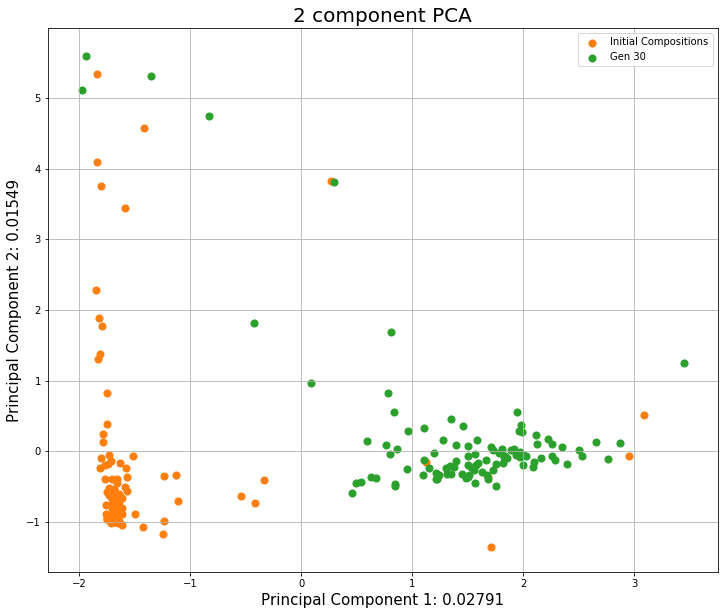

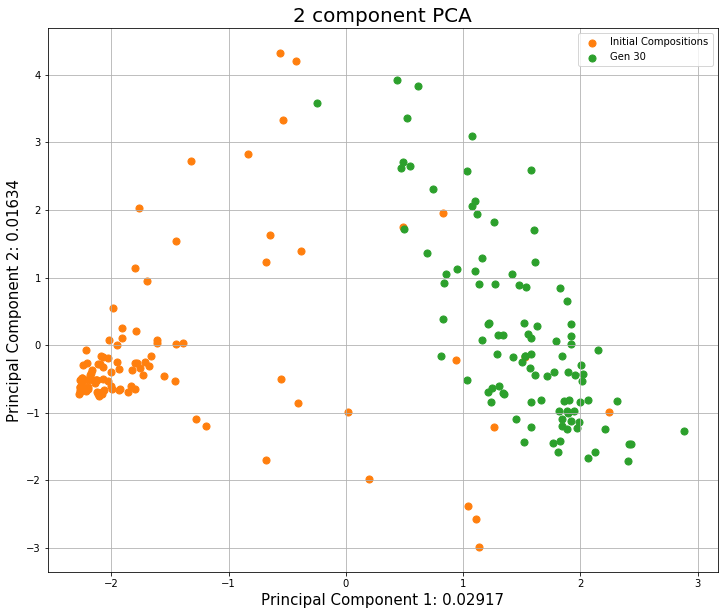

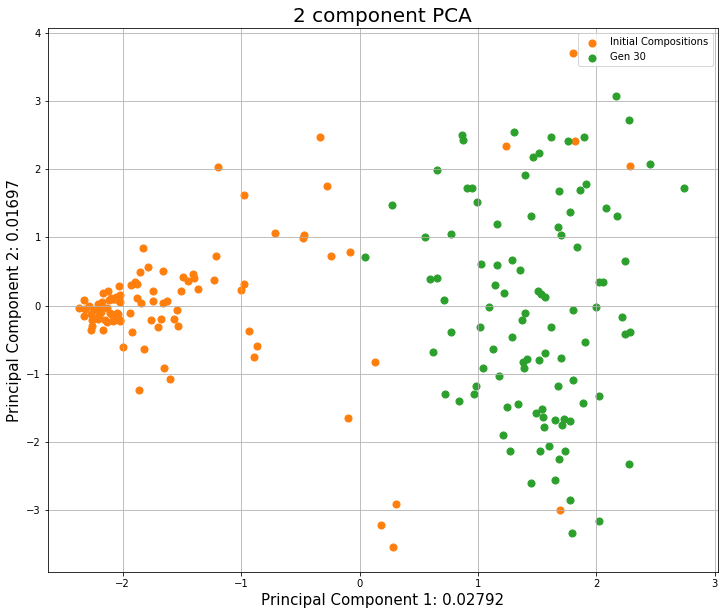

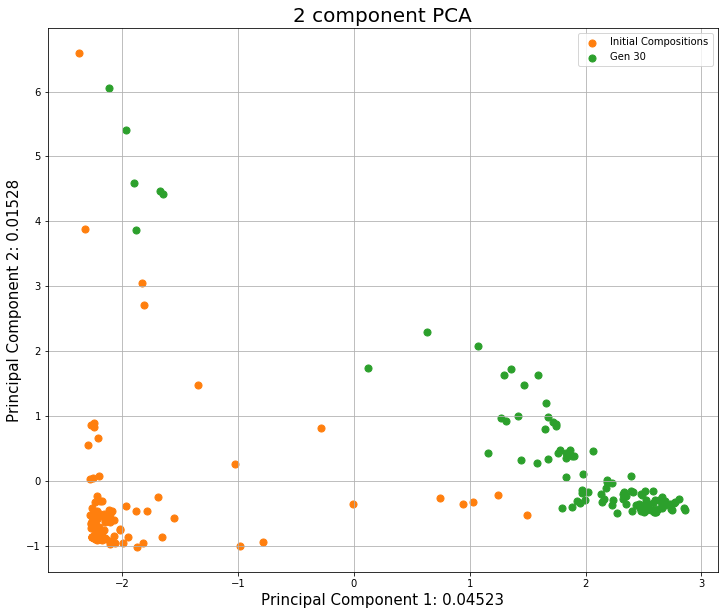

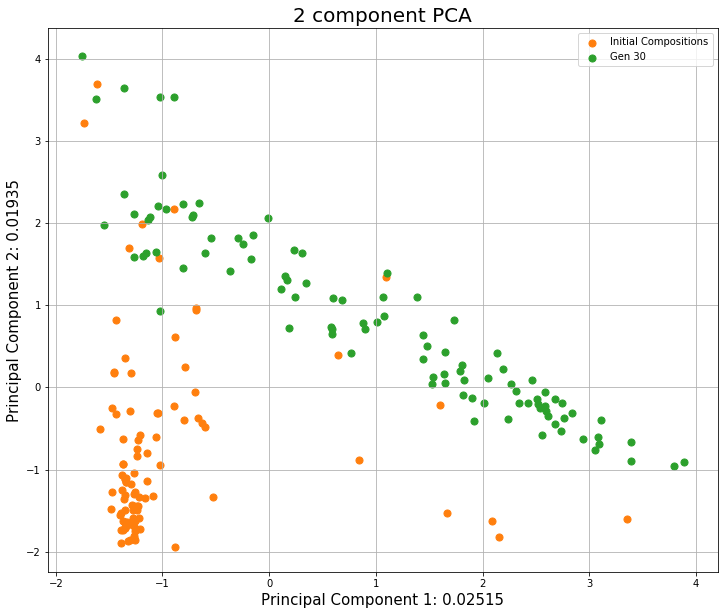

In [122]:
'''test this for beta 1'''
for beta_idx, beta in enumerate(betas_seeds):
    the_big_dict_of_data = {}
    counter = 0
    for key in dict_data_for_PCA[beta].keys():
        for comp_idx, comp in enumerate(dict_data_for_PCA[beta][key]):
            comp_mod = copy.deepcopy(comp)
            comp_mod.insert(0,key)
            the_big_dict_of_data[counter] = comp_mod
            counter += 1
    the_big_dataframe_of_data = pd.DataFrame(the_big_dict_of_data).T
    the_big_dataframe_of_data = the_big_dataframe_of_data.rename(columns = {0:'target'})
    #display(the_big_dataframe_of_data)

    # Separating out the features
    x = the_big_dataframe_of_data.iloc[:, 1:].values
    # Separating out the target
    y = the_big_dataframe_of_data.loc[:,['target']].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    #display(x)
    pca_init = PCA(2)
    pca = pca_init.fit_transform(x)
    principalDf = pd.DataFrame(data = pca, columns = ['principal component 1', 'principal component 2'])
    principalDf['target'] = copy.deepcopy(the_big_dataframe_of_data['target'])
    display(principalDf)

    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Principal Component 1: ' + str("{:.5f}".format(pca_init.explained_variance_ratio_[0])), fontsize = 15)
    ax.set_ylabel('Principal Component 2: ' + str("{:.5f}".format(pca_init.explained_variance_ratio_[1])), fontsize = 15)

    ax.set_title('2 component PCA', fontsize = 20)
    targets = list(set(list(principalDf['target'])))
    colors = ['#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf','#373e02']
    for target, color in zip(targets,colors):
        indicesToKeep = principalDf['target'] == target
        ax.scatter(principalDf.loc[indicesToKeep,'principal component 1'], principalDf.loc[indicesToKeep,'principal component 2'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()